In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('telecom_churn.csv')

In [ ]:
df.shape

(243553, 14)

In [ ]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [ ]:
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [ ]:
# removing not needed columns
df = df[[ 'telecom_partner', 'gender', 'age', 'state',
        'date_of_registration', 'num_dependents', 'estimated_salary',
        'calls_made', 'sms_sent', 'data_used', 'churn']].copy()

In [ ]:
# renaming columns
df = df.rename(columns={'telecom_partner':'Telecom_Partner',
                        'gender':'Gender',
                        'age':'Age',
                        'state':'State',
                        'date_of_registration':'Registration_Date',
                        'num_dependents':'Num_Dependents',
                        'estimated_salary':'Estimated_Salary',
                        'calls_made':'Calls_Made',
                        'sms_sent':'SMS_Sent',
                        'data_used':'Data_Used',
                        'churn':'Churn'})

In [ ]:
df.describe()

,Age,Num_Dependents,Estimated_Salary,Calls_Made,SMS_Sent,Data_Used,Churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,46.077609,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,16.444029,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,18.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,32.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,46.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,60.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,74.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [ ]:
# checking nulls
df.isna().sum()

,0
Telecom_Partner,0
Gender,0
Age,0
State,0
Registration_Date,0
Num_Dependents,0
Estimated_Salary,0
Calls_Made,0
SMS_Sent,0
Data_Used,0


In [ ]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# number of churns
df['Churn'].value_counts()

,count
Churn,
0,194726
1,48827


In [ ]:
# percentage of churns
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,79.952208
1,20.047792


In [ ]:
(df['Calls_Made'] < 0).sum()

np.int64(6713)

In [ ]:
(df['SMS_Sent'] < 0).sum()

np.int64(7375)

In [ ]:
(df['Data_Used'] < 0).sum()

np.int64(6050)

In [ ]:
# handling negative values
df['Calls_Made'] = df['Calls_Made'].apply(lambda x: max(x,0))
df['SMS_Sent'] = df['SMS_Sent'].apply(lambda x: max(x,0))
avg = df[df['Data_Used'] >= 0]['Data_Used'].mean()
df['Data_Used'] = df['Data_Used'].apply(lambda x: avg if x < 0 else x)

In [ ]:
df.corr(numeric_only=True)

,Age,Num_Dependents,Estimated_Salary,Calls_Made,SMS_Sent,Data_Used,Churn
Age,1.000000,0.001462,-0.003103,-0.001369,-0.002828,0.001223,0.000839
Num_Dependents,0.001462,1.000000,0.002157,0.000286,0.002144,0.001979,-0.002543
Estimated_Salary,-0.003103,0.002157,1.000000,-0.000138,0.002565,-0.002898,-0.003332
Calls_Made,-0.001369,0.000286,-0.000138,1.000000,0.000127,0.001632,0.001771
SMS_Sent,-0.002828,0.002144,0.002565,0.000127,1.000000,-0.003153,-0.003086
Data_Used,0.001223,0.001979,-0.002898,0.001632,-0.003153,1.000000,0.001561
Churn,0.000839,-0.002543,-0.003332,0.001771,-0.003086,0.001561,1.000000


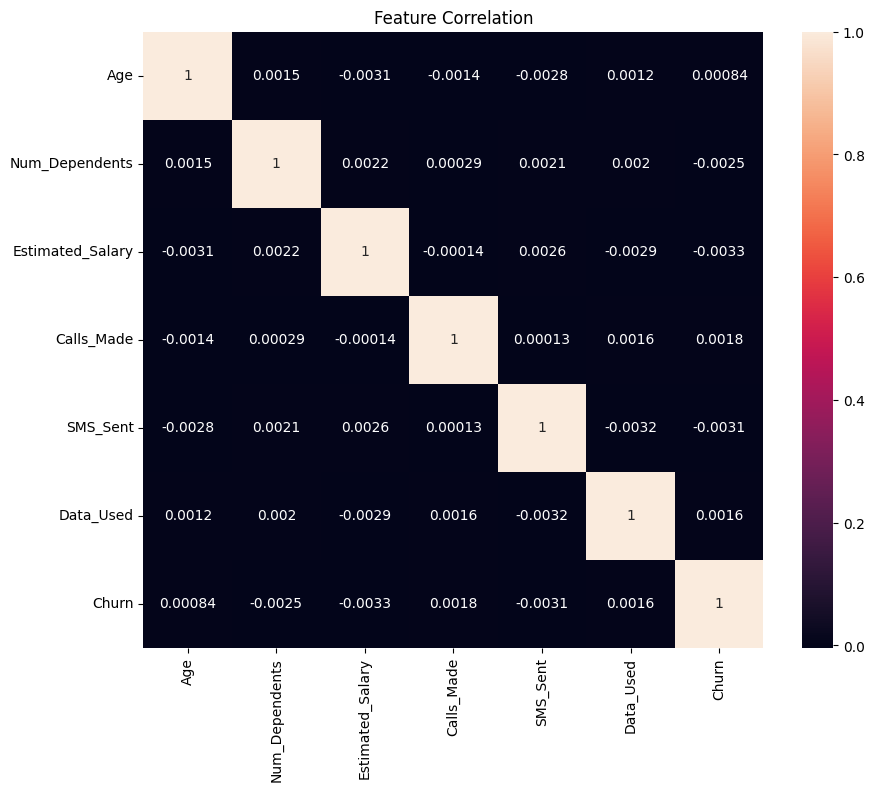

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Feature Correlation")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Telecom_Partner    243553 non-null  object 
 1   Gender             243553 non-null  object 
 2   Age                243553 non-null  int64  
 3   State              243553 non-null  object 
 4   Registration_Date  243553 non-null  object 
 5   Num_Dependents     243553 non-null  int64  
 6   Estimated_Salary   243553 non-null  int64  
 7   Calls_Made         243553 non-null  int64  
 8   SMS_Sent           243553 non-null  int64  
 9   Data_Used          243553 non-null  float64
 10  Churn              243553 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 20.4+ MB


In [ ]:
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'])

In [ ]:
# Split age into 4 groups
df['age_group'] = pd.qcut(df['Age'], q=4, labels=['Q1 (18–36)', 'Q2 (37–48)', 'Q3 (49–60)', 'Q4 (61+)'])
df['age_group'].value_counts()

,count
age_group,
Q1 (18–36),63652
Q4 (61+),60284
Q3 (49–60),60044
Q2 (37–48),59573


In [ ]:
df.groupby('age_group')['Churn'].mean().reset_index()

<ipython-input-22-7462c9819265>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['Churn'].mean().reset_index()


,age_group,Churn
0,Q1 (18–36),0.198438
1,Q2 (37–48),0.203364
2,Q3 (49–60),0.198871
3,Q4 (61+),0.201380


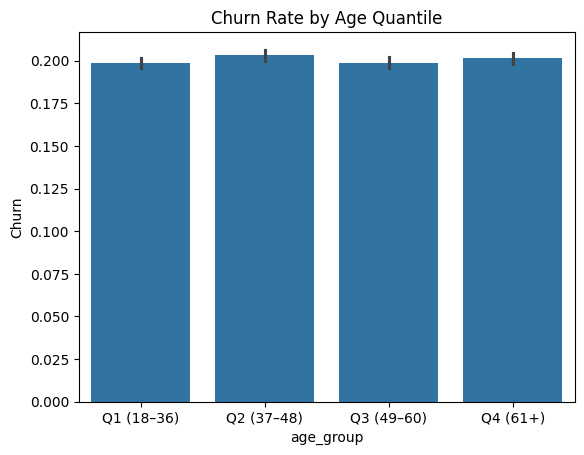

In [ ]:
sns.barplot(x='age_group', y='Churn', data=df)
plt.title('Churn Rate by Age Quantile')
plt.show()

In [ ]:
df.drop('Age',axis=1,inplace=True)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,145977
F,97576


In [ ]:
churn_by_gender = df.groupby('Gender')['Churn'].mean() * 100
print(churn_by_gender)

Gender
F    20.296999
M    19.881214
Name: Churn, dtype: float64


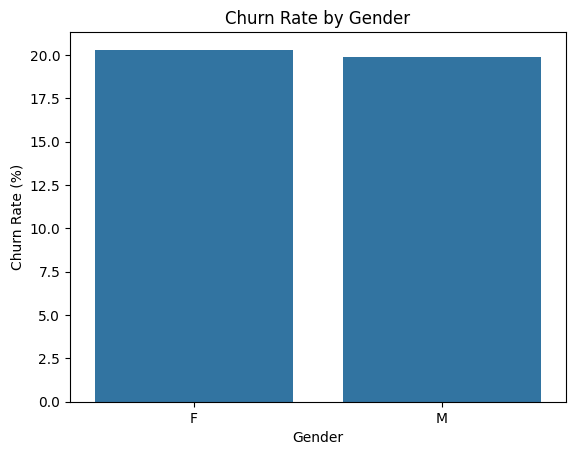

In [ ]:
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values)
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender')
plt.show()

In [ ]:
churn_by_partner = df.groupby('Telecom_Partner')['Churn'].mean() * 100
print(churn_by_partner)

Telecom_Partner
Airtel          20.366144
BSNL            19.860679
Reliance Jio    20.015379
Vodafone        19.948357
Name: Churn, dtype: float64


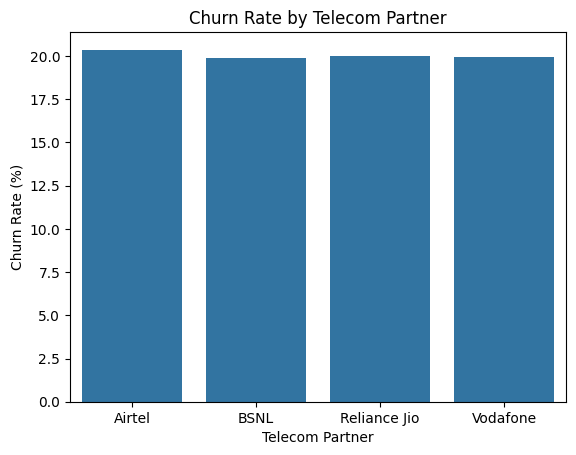

In [ ]:
sns.barplot(x=churn_by_partner.index, y=churn_by_partner.values)
plt.title('Churn Rate by Telecom Partner')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Telecom Partner')
plt.show()

In [ ]:
churn_by_state = df.groupby('State')['Churn'].mean() * 100

In [ ]:
top10_states= churn_by_state.sort_values(ascending=False).head(10)
print(top10_states)

State
Jharkhand           21.119360
Karnataka           20.712267
Mizoram             20.646795
Uttarakhand         20.415537
Himachal Pradesh    20.410044
Madhya Pradesh      20.381082
Assam               20.299520
Odisha              20.247934
Nagaland            20.228918
Rajasthan           20.217143
Name: Churn, dtype: float64


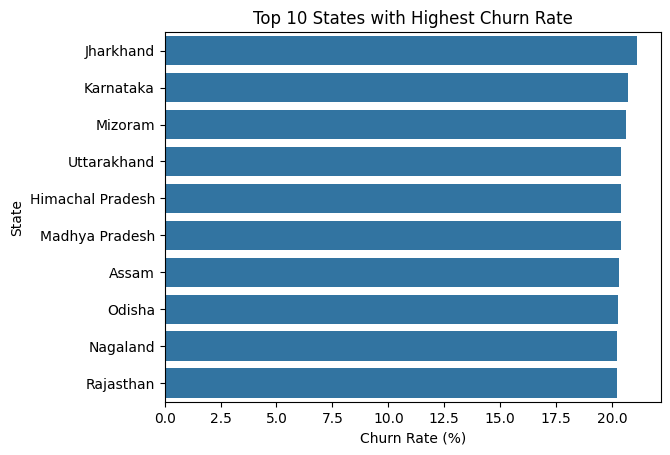

In [ ]:
# Plot the top 10 states with highest churn rate

sns.barplot(x=top10_states.values, y=top10_states.index)
plt.title('Top 10 States with Highest Churn Rate')
plt.xlabel('Churn Rate (%)')
plt.ylabel('State')
plt.show()

In [ ]:
df['Tenure'] = (pd.to_datetime('today') - df['Registration_Date']) / pd.Timedelta(days=30)

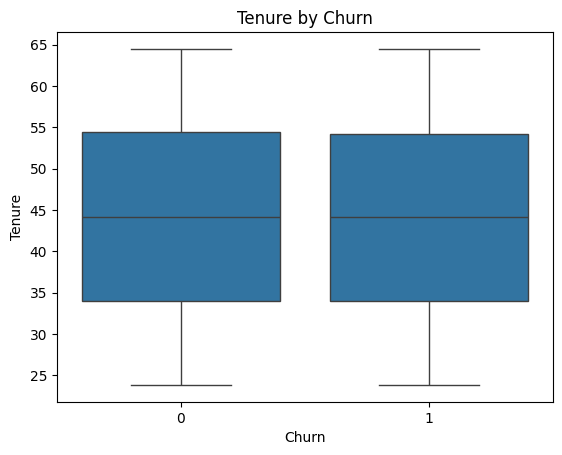

In [ ]:
sns.boxplot(x='Churn',y='Tenure',data=df)
plt.title('Tenure by Churn')
plt.show()

In [ ]:
df.drop('Registration_Date',axis=1,inplace=True)

In [ ]:
df.groupby('Churn')['Estimated_Salary'].mean()

,Estimated_Salary
Churn,
0,85083.726934
1,84771.527495


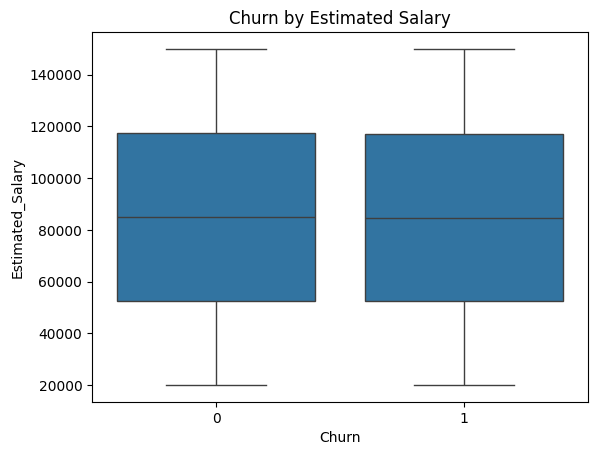

In [ ]:
sns.boxplot(x='Churn',y='Estimated_Salary',data=df)
plt.title('Churn by Estimated Salary')
plt.show()

In [ ]:
df['salary_level'] = pd.cut(df['Estimated_Salary'], bins=3,labels=['Low','Medium','High'])
churn_by_salary = df.groupby('salary_level')['Churn'].mean().reset_index()
print(churn_by_salary)

  salary_level     Churn
0          Low  0.201479
1       Medium  0.201458
2         High  0.198498


<ipython-input-38-250ca27bf7fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_salary = df.groupby('salary_level')['Churn'].mean().reset_index()


In [ ]:
df.drop('Estimated_Salary',axis=1,inplace=True)

In [ ]:
df.groupby('Churn')['Calls_Made'].mean()

,Calls_Made
Churn,
0,49.094178
1,49.223585


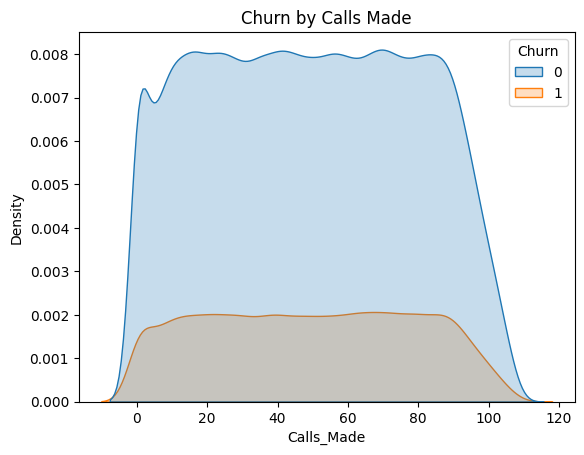

In [ ]:
sns.kdeplot(data=df,x='Calls_Made',hue='Churn',fill=True)
plt.title('Churn by Calls Made')
plt.show()

In [ ]:
df.groupby('Churn')['SMS_Sent'].mean()

,SMS_Sent
Churn,
0,24.038336
1,23.925697


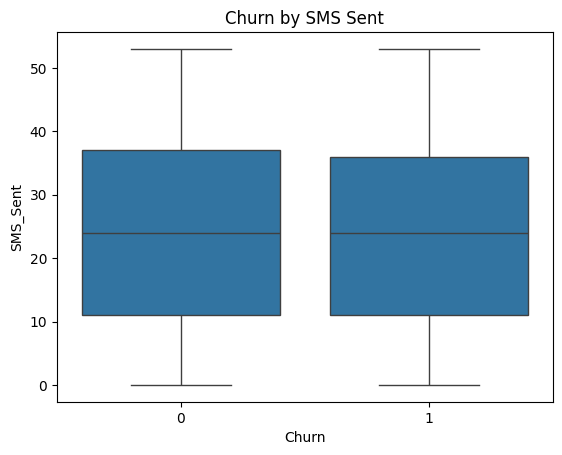

In [ ]:
sns.boxplot(x='Churn',y='SMS_Sent',data=df)
plt.title('Churn by SMS Sent')
plt.show()

In [ ]:
df.groupby('Churn')['Data_Used'].mean()

,Data_Used
Churn,
0,5126.554350
1,5137.536981


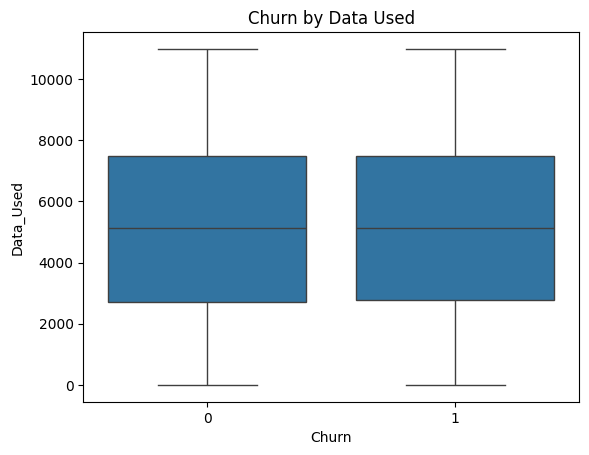

In [ ]:
sns.boxplot(x='Churn',y='Data_Used',data=df)
plt.title('Churn by Data Used')
plt.show()

# Machine Learning Model using Scikit Learn

In [ ]:
# One-Hot Encode nominal variables
df_encoded = pd.get_dummies(df, columns=['Telecom_Partner', 'Gender', 'State'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encode ordinal variables
label_encoders = {}
for col in ['age_group', 'salary_level']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Evaluate on test set
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.80      0.51      0.63     38928
           1       0.20      0.50      0.29      9783

    accuracy                           0.51     48711
   macro avg       0.50      0.51      0.46     48711
weighted avg       0.68      0.51      0.56     48711

ROC-AUC Score: 0.5057


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Random Forest with class weights
rf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.11      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.46      0.50      0.44     48711
weighted avg       0.66      0.80      0.71     48711

Score: 0.4990


In [ ]:
# Evaluate on training set
y_train_pred_rf = rf.predict(X_train)
print("Random Forest Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_rf))

roc_auc_train_rf = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print(f"ROC-AUC Score (Training Set): {roc_auc_train_rf:.4f}")

Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    155798
           1       1.00      1.00      1.00     39044

    accuracy                           1.00    194842
   macro avg       1.00      1.00      1.00    194842
weighted avg       1.00      1.00      1.00    194842

ROC-AUC Score (Training Set): 1.0000


# Model performs better with training data than test data, there is Overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
# Train Random Forest with class weights
rf = RandomForestClassifier(random_state=42,
                            n_estimators=50 # Reduce number of trees
                            ,max_depth=10, # Limit tree depth
                            min_samples_split=10, # Require more samples per split
                            class_weight='balanced')
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69     38928
           1       0.20      0.39      0.26      9783

    accuracy                           0.57     48711
   macro avg       0.50      0.50      0.48     48711
weighted avg       0.68      0.57      0.61     48711

Score: 0.5016


In [ ]:
# Evaluate on training set
y_train_pred_rf = rf.predict(X_train)
print("Random Forest Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_rf))

roc_auc_train_rf = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print(f"ROC-AUC Score (Training Set): {roc_auc_train_rf:.4f}")

Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.88      0.66      0.76    155798
           1       0.32      0.63      0.42     39044

    accuracy                           0.66    194842
   macro avg       0.60      0.65      0.59    194842
weighted avg       0.76      0.66      0.69    194842

ROC-AUC Score (Training Set): 0.7097


# Overfitting issue is solved, but the accuracy not that high

In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=200,          # Increase number of trees
    max_depth=20,              # Increase maximum depth
    min_samples_split=2,       # Decrease minimum samples required to split
    min_samples_leaf=1,        # Decrease minimum samples required at a leaf node
    class_weight='balanced'    # Handle class imbalance
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Calls_Made', 'SMS_Sent', 'Data_Used']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     38928
           1       0.21      0.06      0.09      9783

    accuracy                           0.77     48711
   macro avg       0.50      0.50      0.48     48711
weighted avg       0.68      0.77      0.71     48711

ROC-AUC Score: 0.5057


In [ ]:
# Evaluate on training set
y_train_pred_rf = rf.predict(X_train)
print("Random Forest Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_rf))

roc_auc_train_rf = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print(f"ROC-AUC Score (Training Set): {roc_auc_train_rf:.4f}")

Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87    155798
           1       0.32      0.09      0.14     39044

    accuracy                           0.78    194842
   macro avg       0.56      0.52      0.50    194842
weighted avg       0.71      0.78      0.73    194842

ROC-AUC Score (Training Set): 0.5857


# Deployment using Streamlit

In [ ]:
!pip install streamlit

In [ ]:
!pip install joblib

In [ ]:
# Save the Trained Model
import joblib
joblib.dump(best_rf, 'churn_model.pkl')

['churn_model.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('churn_model.pkl')

# Title and navigation
st.title("Churn Prediction Dashboard")
option = st.sidebar.radio("Select an option:", ["Exploratory Data Analysis (EDA)", "Churn Prediction"])

# Churn Prediction Section
if option == "Churn Prediction":
    st.header("Churn Prediction")
    age = st.number_input("Age", min_value=18, max_value=100, value=35)
    estimated_salary = st.number_input("Estimated Salary", min_value=0, value=50000)
    calls_made = st.number_input("Calls Made", min_value=0, value=100)
    sms_sent = st.number_input("SMS Sent", min_value=0, value=50)
    data_used = st.number_input("Data Used (GB)", min_value=0, value=5)

    if st.button("Predict Churn"):
        input_data = pd.DataFrame({
            'age': [age],
            'estimated_salary': [estimated_salary],
            'calls_made': [calls_made],
            'sms_sent': [sms_sent],
            'data_used': [data_used]
        })
        prediction = model.predict(input_data)[0]
        probability = model.predict_proba(input_data)[0][1]

        if prediction == 1:
            st.error("The customer is likely to churn.")
        else:
            st.success("The customer is not likely to churn.")
        st.write(f"Probability of churn: {probability:.2%}")

2025-04-18 19:24:31.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 19:24:31.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar